### Image Processing With a CNN 
Distinguish images of dogs from cats<br>
Data:<br>
https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition

### Data preparation, exploration, visualization

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# prepare dir for unzipped images
os.makedirs('my_images', exist_ok=True)
unzip_dn = 'my_images'
train_dn = unzip_dn+'/train'
test_dn = unzip_dn+'/test'

# set variables
random_state = 123

In [3]:
# unzip data if not already present
if not os.path.isdir(train_dn):
  print('unzipping...')
  with zipfile.ZipFile('drive/MyDrive/input/dogs-vs-cats-redux-kernels-edition/train.zip', 'r') as zz:
    zz.extractall(unzip_dn)
  with zipfile.ZipFile('drive/MyDrive/input/dogs-vs-cats-redux-kernels-edition/test.zip', 'r') as zz:
    zz.extractall(unzip_dn)
  print('done')
else:
  print('image directory present')

# get list of train + test images
train_im_list = os.listdir(train_dn)
test_im_list = os.listdir(test_dn)

image directory present


In [4]:
# training data: get image labels from file name
label_list = []
for file in os.listdir(train_dn):
  if (file.split('.')[0]=='dog'): label_list.append(str(1))
  elif (file.split('.')[0]=='cat'): label_list.append(str(0))
  
# training data: get df of images and labels
df = pd.DataFrame({'filename':train_im_list, 'label':label_list})
print(df.shape)
df.head()

(25000, 2)


,filename,label
0,dog.12447.jpg,1
1,cat.245.jpg,0
2,dog.4133.jpg,1
3,cat.6425.jpg,0
4,dog.8869.jpg,1


In [5]:
# train val split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=random_state)
print('train:', train_df.shape, '; val:', val_df.shape)

train: (20000, 2) ; val: (5000, 2)


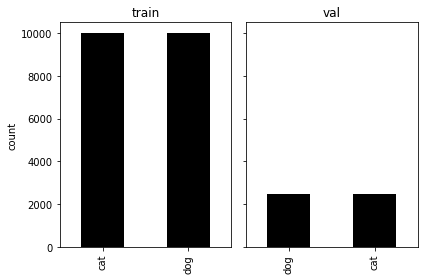

In [6]:
# label class distribution; verify stratified train/val split
fig, axs = plt.subplots(1,2, sharey=True)
train_df['label'].map({'1':'dog', '0':'cat'}).value_counts().plot(kind='bar', color='k', ax=axs[0])
val_df['label'].map({'1':'dog', '0':'cat'}).value_counts().plot(kind='bar', color='k', ax=axs[1])
axs[0].set(title='train', ylabel='count')
axs[1].set(title='val')
fig.tight_layout()
plt.show()

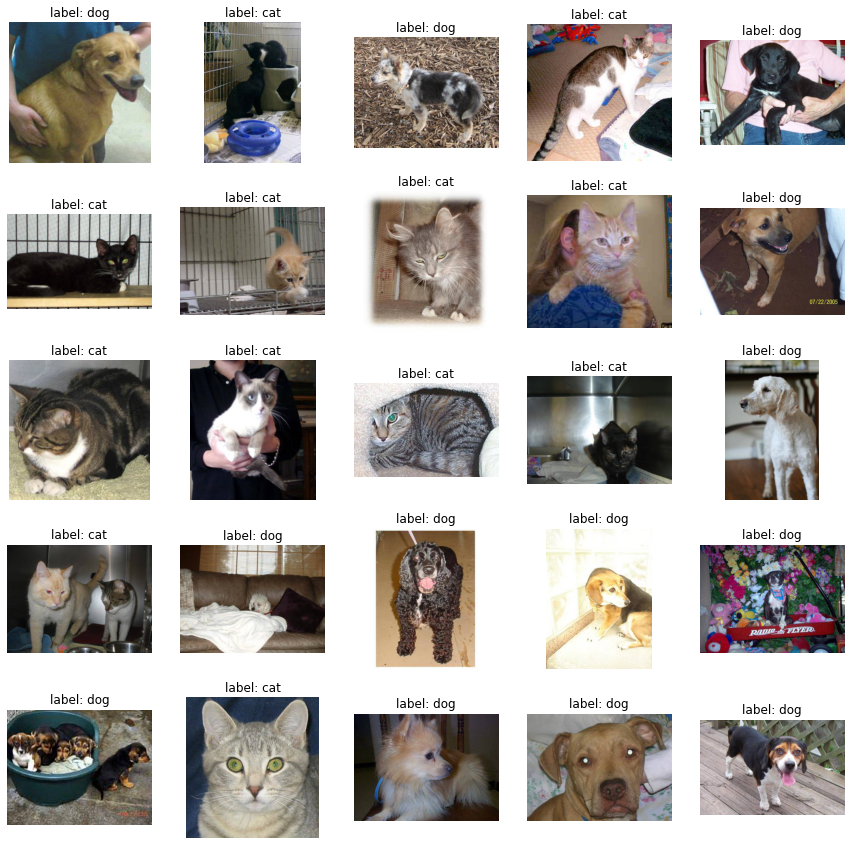

In [7]:
# visualize train data; plot 25 samples
fig, axs = plt.subplots(5, 5, figsize = (15, 15))
for ii, ax in enumerate(axs.flat):
  ax.imshow(Image.open(os.path.join(train_dn, train_im_list[ii])))
  ax.axis('off')
  ax.set_title('label: {}'.format(train_im_list[ii].split('.')[0]))
plt.show()
fig.savefig('train_example.pdf', format='pdf', bbox_inches='tight')

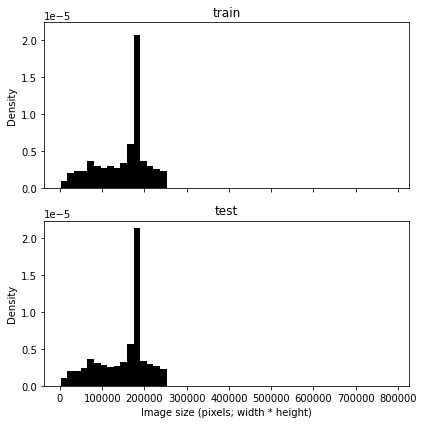

In [8]:
# get distribution of image size
train_im_size_list, test_im_size_list = [], []
train_im_mode_list, test_im_mode_list = [], []
for train_im in train_im_list:
  im = Image.open(os.path.join(train_dn, train_im))
  train_im_size_list.append(np.prod(im.size))
  train_im_mode_list.append(im.mode)
for test_im in test_im_list:
  im = Image.open(os.path.join(test_dn, test_im))
  test_im_size_list.append(np.prod(im.size))
  test_im_mode_list.append(im.mode)

# plot results
fig, axs = plt.subplots(2,1, figsize=(6,6), sharey=True, sharex=True)
bins = np.histogram(np.hstack((train_im_size_list, test_im_size_list)), bins=50)[1] # get the bin edges
axs[0].hist(train_im_size_list, bins=bins, color='k', density=True)
axs[1].hist(test_im_size_list, bins=bins, color='k', density=True)
axs[0].set_title('train')
axs[1].set_title('test')
for ax in axs:
  ax.set_ylabel('Density')
axs[1].set_xlabel('Image size (pixels; width * height)')
fig.tight_layout()
plt.show()
fig.savefig('im_sizes.pdf', format='pdf', bbox_inches='tight')

In [9]:
# all color RGB images
print(pd.Series(train_im_mode_list).value_counts())
print(pd.Series(test_im_mode_list).value_counts())

RGB    25000
dtype: int64
RGB    12500
dtype: int64
